In [78]:
import pandas as pd
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
OUTCOMES_FOLDER = "project-runs/outcomes"
PACKAGE_MANAGERS = ["maven", "npm"]
COUNTS = ["counts"]
RAN_OR_NOT = ["failures", "success"]
PATTERN = "{}/{}-runs_{}.json"

In [80]:
ran = {
  pm: {
    ran: pd.read_json(PATTERN.format(OUTCOMES_FOLDER, pm, ran)).values.flatten().tolist()
    for ran in RAN_OR_NOT
  }
  for pm in PACKAGE_MANAGERS
}
ran

{'maven': {'failures': ['results_2025-05-13-00-52-34',
   'results_2025-05-13-06-33-25',
   'results_2025-05-13-08-24-20',
   'results_2025-05-13-10-08-49'],
  'success': ['results_2025-05-13-04-40-47',
   'results_2025-05-13-05-58-19',
   'results_2025-05-13-06-22-47',
   'results_2025-05-13-02-03-14',
   'results_2025-05-13-08-42-55',
   'results_2025-05-13-02-47-58',
   'results_2025-05-13-11-39-32',
   'results_2025-05-13-09-27-04',
   'results_2025-05-13-03-21-19',
   'results_2025-05-13-02-20-06',
   'results_2025-05-13-09-01-36',
   'results_2025-05-13-02-34-35',
   'results_2025-05-13-11-23-14',
   'results_2025-05-13-10-28-16',
   'results_2025-05-13-03-43-29',
   'results_2025-05-13-09-44-13',
   'results_2025-05-13-01-46-07',
   'results_2025-05-13-08-09-14',
   'results_2025-05-13-10-08-53',
   'results_2025-05-13-05-27-35',
   'results_2025-05-13-09-08-41',
   'results_2025-05-13-03-05-48',
   'results_2025-05-13-04-20-04',
   'results_2025-05-13-05-02-49',
   'results_202

In [81]:
import os
from pathlib import Path

def find_log_without_md(base_dir):
    base_path = Path(base_dir)
    result = []

    # Iterate only over first-level subdirectories
    for subdir in base_path.iterdir():
        if subdir.is_dir():
            log_exists = any(file.suffix == '.log' for file in subdir.iterdir())
            md_exists = any(file.suffix == '.md' for file in subdir.iterdir())
            if log_exists and not md_exists:
                result.append(str(subdir))

    return result

# Example usage
maven_dirs = find_log_without_md('project-runs/maven-runs')
npm_dirs = find_log_without_md('project-runs/npm-runs')

print("Maven dirs:", json.dumps(maven_dirs, indent=2))
print("NPM dirs:", json.dumps(npm_dirs, indent=2))

Maven dirs: [
  "project-runs/maven-runs/results_2025-05-13-00-52-34",
  "project-runs/maven-runs/results_2025-05-13-06-33-25",
  "project-runs/maven-runs/results_2025-05-13-08-24-20",
  "project-runs/maven-runs/results_2025-05-13-10-08-49"
]
NPM dirs: [
  "project-runs/npm-runs/results_2025-05-13-00-32-41",
  "project-runs/npm-runs/results_2025-05-13-00-40-05",
  "project-runs/npm-runs/results_2025-05-13-00-49-06",
  "project-runs/npm-runs/results_2025-05-13-00-49-05",
  "project-runs/npm-runs/results_2025-05-13-00-32-42",
  "project-runs/npm-runs/results_2025-05-13-00-29-15",
  "project-runs/npm-runs/results_2025-05-13-00-52-16",
  "project-runs/npm-runs/results_2025-05-13-00-31-16"
]


In [82]:
reasons = {
  "maven": {
    "results_2025-05-13-00-52-34": "mvn dependency:tree error",
    "results_2025-05-13-06-33-25": "mvn dependency:resolve-plugins error",
    "results_2025-05-13-08-24-20": "mvn dependency:tree error",
    "results_2025-05-13-10-08-49": "mvn dependency:tree error",
  },
  "npm": {
    "results_2025-05-13-00-32-41": "package-lock.json format unexpected",
    "results_2025-05-13-00-40-05": "package-lock.json format unexpected",
    "results_2025-05-13-00-49-06": "package-lock.json format unexpected",
    "results_2025-05-13-00-49-05": "package-lock.json format unexpected",
    "results_2025-05-13-00-32-42": "package-lock.json format unexpected",
    "results_2025-05-13-00-29-15": "package-lock.json format unexpected",
    "results_2025-05-13-00-52-16": "package-lock.json format unexpected",
    "results_2025-05-13-00-31-16": "package-lock.json format unexpected",
  },
}

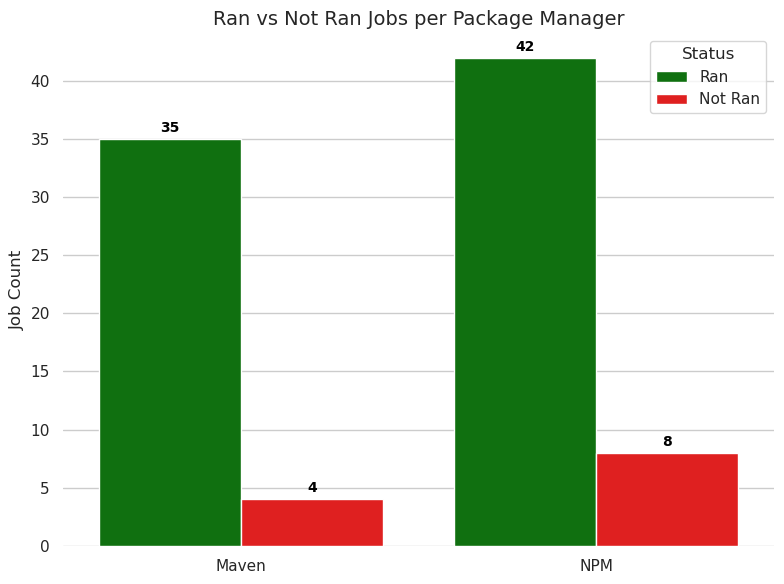

In [83]:
data = {
    'Package Manager': ['Maven', 'Maven', 'NPM', 'NPM'],
    'Status': ['Ran', 'Not Ran', 'Ran', 'Not Ran'],
    'Count': [len(ran["maven"]["success"]), len(ran["maven"]["failures"]), len(ran["npm"]["success"]), len(ran["npm"]["failures"])],
}

df = pd.DataFrame(data)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Package Manager', y='Count', hue='Status', palette={'Ran': 'green', 'Not Ran': 'red'}, dodge=True)
sns.despine(left=True, bottom=True)

# Annotate bar values
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, color='black', weight='bold')

# Final formatting
plt.title('Ran vs Not Ran Jobs per Package Manager', fontsize=14)
plt.ylabel('Job Count')
plt.xlabel('')
plt.tight_layout()
plt.show()

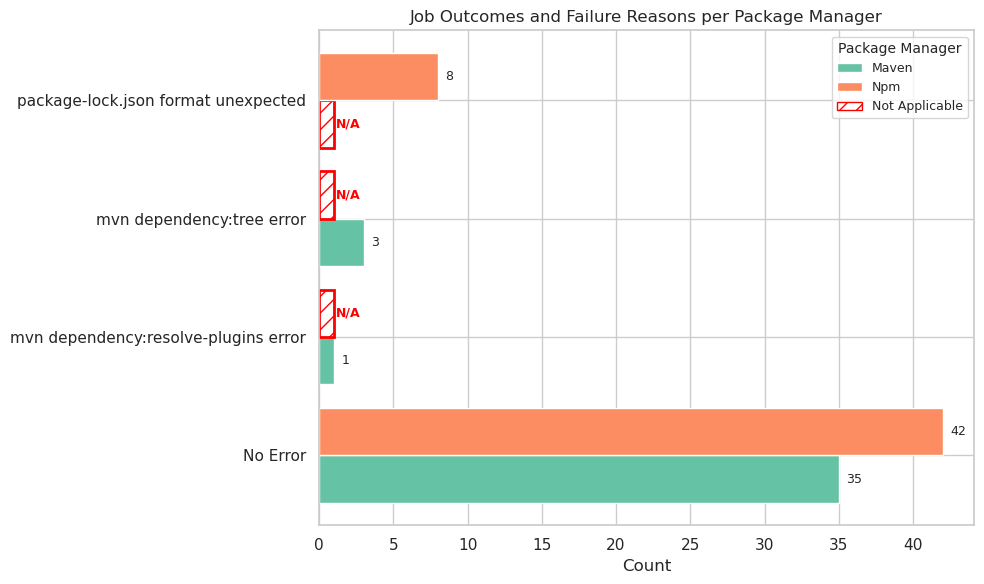

In [84]:
from matplotlib.patches import Patch

success_counts = {
    "maven": len(ran["maven"]["success"]),
    "npm": len(ran["npm"]["success"]),
}

# Prepare data
records = []

for manager, failures in reasons.items():
    for _, reason in failures.items():
        records.append({'Package Manager': manager.capitalize(), 'Reason': reason})

for manager, count in success_counts.items():
    for _ in range(count):
        records.append({'Package Manager': manager.capitalize(), 'Reason': 'No Error'})

df = pd.DataFrame(records)

# All known reasons and managers
all_reasons = sorted(df['Reason'].unique(), reverse=True)
managers = ['Maven', 'Npm']

# Create a complete DataFrame including 0s and N/A markers
plot_data = []

for reason in all_reasons:
    for manager in managers:
        count = df[(df['Package Manager'] == manager) & (df['Reason'] == reason)].shape[0]
        is_applicable = df[df['Reason'] == reason]['Package Manager'].isin([manager]).any()
        plot_data.append({
            'Package Manager': manager,
            'Reason': reason,
            'Count': count,
            'Applicable': is_applicable
        })

df_full = pd.DataFrame(plot_data)

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

bar_width = 0.4
y_labels = list(reversed(all_reasons))
y_positions = range(len(y_labels))

position_map = {
    (reason, 'Maven'): i - bar_width / 2
    for i, reason in enumerate(y_labels)
}
position_map.update({
    (reason, 'Npm'): i + bar_width / 2
    for i, reason in enumerate(y_labels)
})

colors = {'Maven': '#66c2a5', 'Npm': '#fc8d62'}

for reason in y_labels:
    for manager in managers:
        key = (reason, manager)
        row = df_full[(df_full['Reason'] == reason) & (df_full['Package Manager'] == manager)].iloc[0]
        pos = position_map[key]
        count = row['Count']

        if not row['Applicable']:
            # N/A bar
            plt.barh(pos, 1, height=bar_width, color='none', edgecolor='red', hatch='//', linewidth=2)
            plt.text(1.1, pos, "N/A", va='center', fontsize=9, color='red', weight='bold')
        elif count > 0:
            # Actual bar
            plt.barh(pos, count, height=bar_width, color=colors[manager])
            plt.text(count + 0.5, pos, str(count), va='center', fontsize=9)

# Formatting
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)
plt.xlabel("Count")
plt.title("Job Outcomes and Failure Reasons per Package Manager")

# Legend
legend_handles = [
    Patch(facecolor=colors['Maven'], label='Maven'),
    Patch(facecolor=colors['Npm'], label='Npm'),
    Patch(facecolor='none', edgecolor='red', hatch='//', label='Not Applicable')
]

plt.legend(handles=legend_handles, title="Package Manager", fontsize=9, title_fontsize=10)
plt.tight_layout()
plt.show()

In [85]:
counts = {
    pm: pd.read_json(PATTERN.format(OUTCOMES_FOLDER, pm, count)).to_dict()
    for pm in PACKAGE_MANAGERS
    for count in COUNTS
}
counts

{'maven': {'maven-runs/results_2025-05-13-04-40-47': {'total': 479,
   ':wrench: Packages with inaccessible commit SHA/tag \\(⚠️⚠️⚠️⚠️\\):\\s*(\\d+)': 38,
   ':heavy_exclamation_mark: Packages with no source code URL \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 21,
   ':no_entry: Packages with repo URL that is 404 \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 5,
   ':black_square_button: Packages without build attestation \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 0,
   ':unlock: Packages with invalid code signature \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 11,
   ':lock: Packages without code signature \\(⚠️⚠️\\):\\s*(\\d+)': 81,
   ':x: Packages that are deprecated \\(⚠️⚠️\\):\\s*(\\d+)': 0,
   ':alien: Packages that are aliased \\(⚠️⚠️\\):\\s*(\\d+)': 0},
  'maven-runs/results_2025-05-13-05-58-19': {'total': 445,
   ':wrench: Packages with inaccessible commit SHA/tag \\(⚠️⚠️⚠️⚠️\\):\\s*(\\d+)': 69,
   ':heavy_exclamation_mark: Packages with no source code URL \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 9,
   ':no_entry: Packages with repo URL that is 404 \\(⚠️⚠️⚠️\\):\\s

Run: maven-runs/results_2025-05-13-04-40-47, Critical Found: True, Issues: {'total': 479, ':wrench: Packages with inaccessible commit SHA/tag \\(⚠️⚠️⚠️⚠️\\):\\s*(\\d+)': 38, ':heavy_exclamation_mark: Packages with no source code URL \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 21, ':no_entry: Packages with repo URL that is 404 \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 5, ':black_square_button: Packages without build attestation \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 0, ':unlock: Packages with invalid code signature \\(⚠️⚠️⚠️\\):\\s*(\\d+)': 11, ':lock: Packages without code signature \\(⚠️⚠️\\):\\s*(\\d+)': 81, ':x: Packages that are deprecated \\(⚠️⚠️\\):\\s*(\\d+)': 0, ':alien: Packages that are aliased \\(⚠️⚠️\\):\\s*(\\d+)': 0}
Run: maven-runs/results_2025-05-13-04-40-47, Smell: :wrench: Packages with inaccessible commit SHA/tag \(⚠️⚠️⚠️⚠️\):\s*(\d+), Count: 38, Percentage: 7.93%
Run: maven-runs/results_2025-05-13-05-58-19, Critical Found: True, Issues: {'total': 445, ':wrench: Packages with inaccessible commit SHA/tag \\(⚠️⚠️⚠️

/tmp/ipykernel_724691/2440991799.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df, x='Package Manager', y='Critical Smells', palette='Blues')


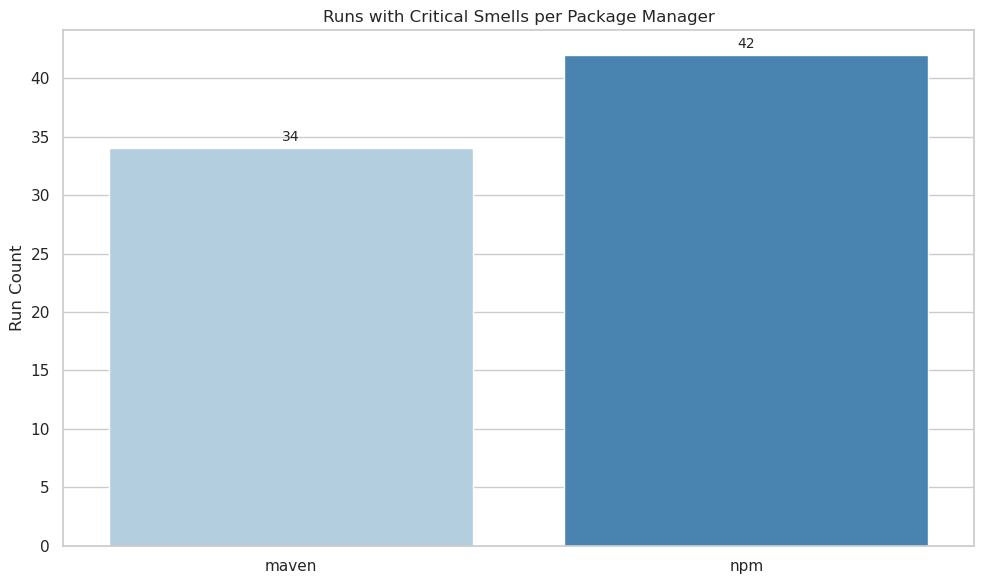

/tmp/ipykernel_724691/2440991799.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df, x='Package Manager', y='Runs with 5% or more Smells', palette='Oranges')


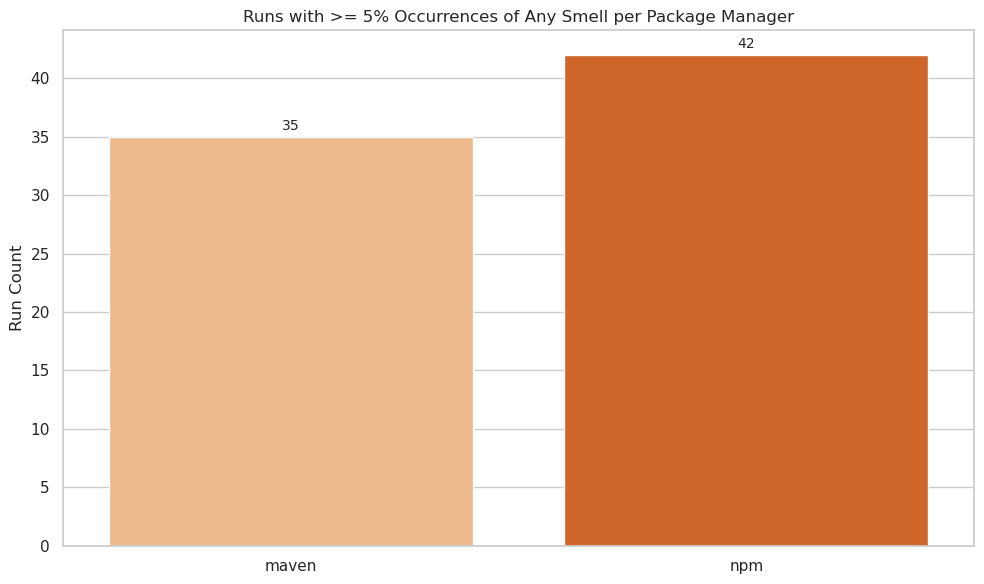

In [86]:
# Define the different smell levels
smell_severities = {
    'critical': '⚠️⚠️⚠️⚠️',
    'high': '⚠️⚠️⚠️',
    'medium': '⚠️⚠️',
    'low': '⚠️'
}

# Prepare data for the plots
data = []

# Loop over each package manager
for manager, runs in counts.items():
    critical_run_count = 0
    total_run_count = 0
    five_percent_run_count = 0
    
    # Loop over each run for the manager
    for run, issues in runs.items():
        total = issues['total']
        total_run_count += 1
        
        # Count critical smells with count higher than 0
        critical_found = any(smell_severities['critical'] in key and count > 0 for key, count in issues.items())
        if critical_found:
            critical_run_count += 1
        print(f"Run: {run}, Critical Found: {critical_found}, Issues: {issues}")
        
        # Count runs with at least 5% of total occurrences for any smell
        for key, count in issues.items():
            if count > 0:
                if any(smell in key for smell in smell_severities.values()):
                    percentage = count / total
                    if percentage >= 0.05:  # At least 5%
                        five_percent_run_count += 1
                        print(f"Run: {run}, Smell: {key}, Count: {count}, Percentage: {percentage:.2%}")
                        break  # Once we find any smell above 5%, we stop checking further for that run

    # Add the counts for this package manager to the data
    data.append({
        'Package Manager': manager,
        'Critical Smells': critical_run_count,
        'Runs with 5% or more Smells': five_percent_run_count,
        'Total Runs': total_run_count
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot 1: Critical Smells
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax1 = sns.barplot(data=df, x='Package Manager', y='Critical Smells', palette='Blues')
ax1.set_title("Runs with Critical Smells per Package Manager")
ax1.set_ylabel("Run Count")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container, padding=3, fontsize=10)
plt.tight_layout()
plt.show()

# Plot 2: Runs with 5% or more Smells (Critical, High, Medium, Low)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax2 = sns.barplot(data=df, x='Package Manager', y='Runs with 5% or more Smells', palette='Oranges')
ax2.set_title("Runs with >= 5% Occurrences of Any Smell per Package Manager")
ax2.set_ylabel("Run Count")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container, padding=3, fontsize=10)
plt.tight_layout()
plt.show()

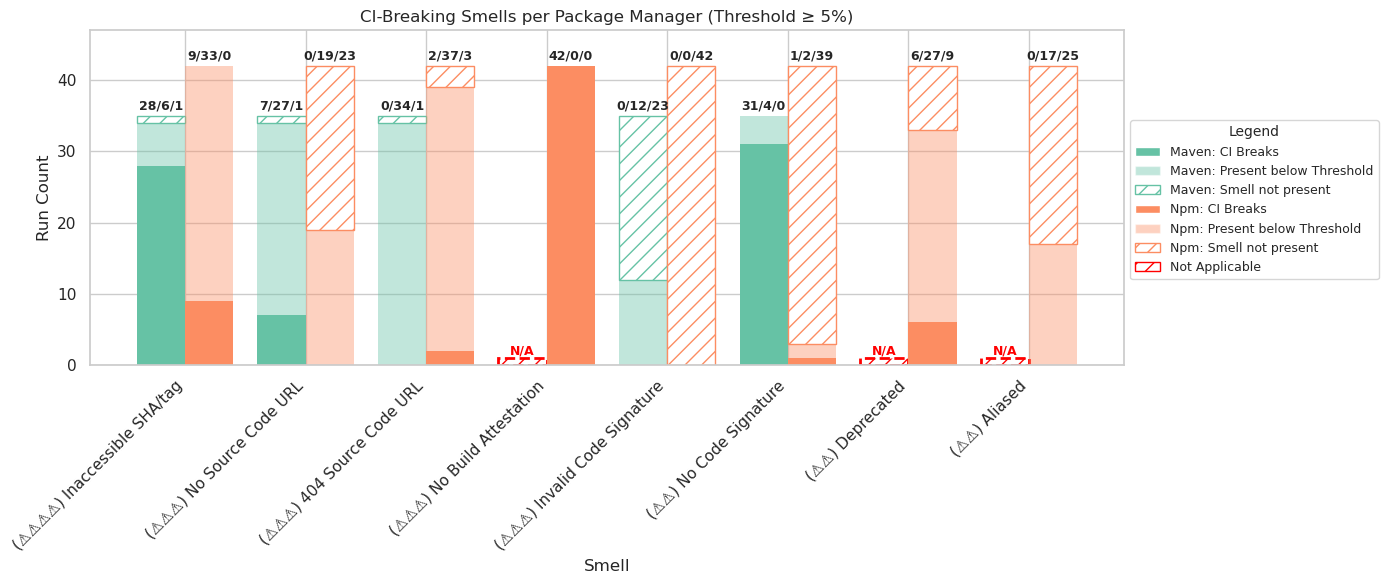

In [87]:
threshold = 0.05

# Map full smell keys to display labels
smell_labels = {
    ":wrench: Packages with inaccessible commit SHA/tag \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️⚠️) Inaccessible SHA/tag",
    ":heavy_exclamation_mark: Packages with no source code URL \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) No Source Code URL",
    ":no_entry: Packages with repo URL that is 404 \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) 404 Source Code URL",
    ":black_square_button: Packages without build attestation \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) No Build Attestation",
    ":unlock: Packages with invalid code signature \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) Invalid Code Signature",
    ":lock: Packages without code signature \\(\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️) No Code Signature",
    ":x: Packages that are deprecated \\(\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️) Deprecated",
    ":alien: Packages that are aliased \\(\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️) Aliased",
}

# Smells not applicable to Maven
not_applicable_smells_for_maven = {
    "(⚠️⚠️⚠️) No Build Attestation",
    "(⚠️⚠️) Deprecated",
    "(⚠️⚠️) Aliased"
}

# Collect data
data = {}

for manager, runs in counts.items():
    for run_id, metrics in runs.items():
        total = metrics['total']
        for key, count in metrics.items():
            if key == 'total' or key not in smell_labels:
                continue
            label = smell_labels[key]
            data.setdefault(label, {}).setdefault(manager, {'breaks': 0, 'has_smell': 0, 'total': 0})
            data[label][manager]['total'] += 1
            if count > 0 and count / total < threshold:
                data[label][manager]['has_smell'] += 1  # Below threshold but smell present
            if count / total >= threshold:
                data[label][manager]['breaks'] += 1  # CI Breaks

# Prepare DataFrame
records = []
for smell, by_manager in data.items():
    for manager, stats in by_manager.items():
        records.append({
            'Smell': smell,
            'Package Manager': manager.capitalize(),
            'Breaks': stats['breaks'],
            'Has Smell': stats['has_smell'],
            'Total': stats['total']
        })

df = pd.DataFrame(records)

# Filter out not applicable smells for Maven
df_filtered = df[~((df['Package Manager'] == 'Maven') & (df['Smell'].isin(not_applicable_smells_for_maven)))]

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

# Bar setup
bar_width = 0.4
x_labels = df['Smell'].unique()
x = range(len(x_labels))
position_map = {
    (smell, 'Maven'): i - bar_width / 2
    for i, smell in enumerate(x_labels)
}
position_map.update({
    (smell, 'Npm'): i + bar_width / 2
    for i, smell in enumerate(x_labels)
})

# Convert df_filtered to lookup
df_lookup = {
    (row['Smell'], row['Package Manager']): row
    for _, row in df_filtered.iterrows()
}

colors = {'Maven': '#66c2a5', 'Npm': '#fc8d62'}
plotted_positions = []

for smell in x_labels:
    for manager in ['Maven', 'Npm']:
        key = (smell, manager)
        pos = position_map[key]
        plotted_positions.append(pos)

        if (manager == 'Maven') and (smell in not_applicable_smells_for_maven):
            plt.bar(pos, 1, width=bar_width, color='none', edgecolor='red',
                    hatch='//', linestyle='--', linewidth=2)
            plt.text(pos, 1.02, "N/A", ha='center', va='bottom',
                     fontsize=9, color='red', weight='bold')
            continue

        if key not in df_lookup:
            continue

        row = df_lookup[key]
        total = row['Total']
        breaks = row['Breaks']
        has_smell = row['Has Smell']
        no_smell = total - (breaks + has_smell)

        # Draw bottom-up: breaks -> has_smell -> no_smell
        current_bottom = 0

        if breaks > 0:
            plt.bar(pos, breaks, width=bar_width, color=colors[manager], linewidth=0)
            current_bottom += breaks

        if has_smell > 0:
            plt.bar(pos, has_smell, bottom=current_bottom, width=bar_width,
                    color=colors[manager], alpha=0.4, linewidth=0)
            current_bottom += has_smell

        if no_smell > 0:
            plt.bar(pos, no_smell, bottom=current_bottom, width=bar_width,
                    color='white', edgecolor=colors[manager], hatch='//', linewidth=1)

        # Top label with breakdown
        plt.text(
            pos,
            total + 0.5,
            f"{breaks}/{has_smell}/{no_smell}",
            ha='center',
            va='bottom',
            fontsize=9,
            weight='bold'
        )



# Formatting
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right')
plt.title("CI-Breaking Smells per Package Manager (Threshold ≥ 5%)")
plt.ylabel("Run Count")
plt.xlabel("Smell")

# Legend
legend_handles = [
    Patch(facecolor=colors['Maven'], label='Maven: CI Breaks'),
    Patch(facecolor=colors['Maven'], alpha=0.4, label='Maven: Present below Threshold'),
    Patch(facecolor='none', edgecolor=colors['Maven'], hatch='//', label='Maven: Smell not present'),
    Patch(facecolor=colors['Npm'], label='Npm: CI Breaks'),
    Patch(facecolor=colors['Npm'], alpha=0.4, label='Npm: Present below Threshold'),
    Patch(facecolor='none', edgecolor=colors['Npm'], hatch='//', label='Npm: Smell not present'),
    Patch(facecolor='none', edgecolor='red', hatch='//', label='Not Applicable')
]


plt.legend(handles=legend_handles, title="Legend", fontsize=9, title_fontsize=10,
           loc='upper left', bbox_to_anchor=(1, 0.75), borderaxespad=0.5)

plt.ylim(top=max(df['Total']) + 5)
plt.tight_layout()
plt.show()


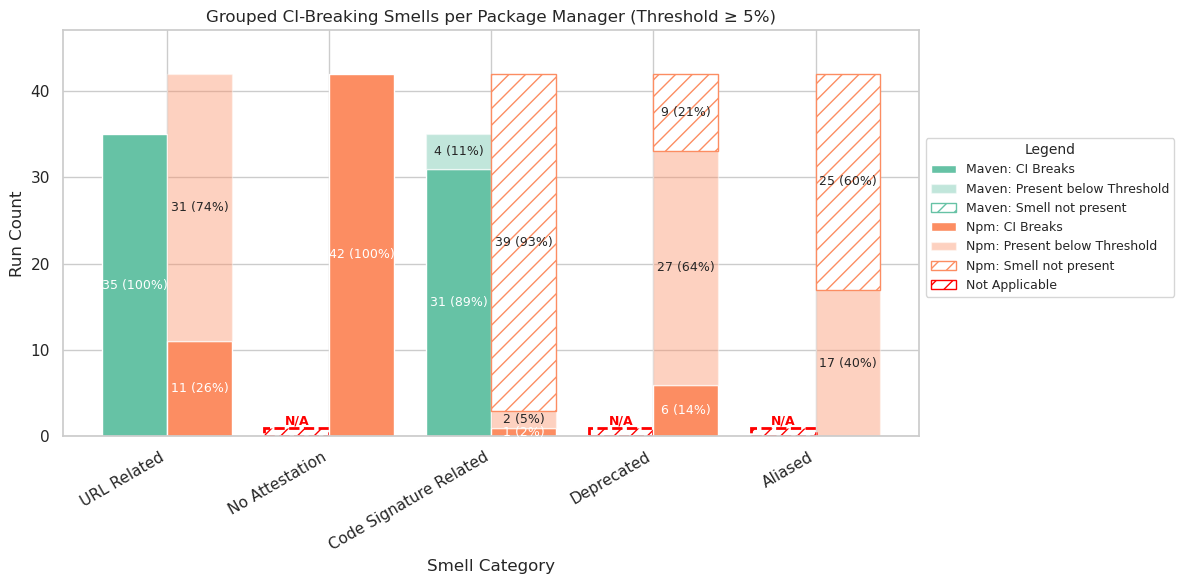

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

threshold = 0.05

# Group definitions
group_map = {
    "(⚠️⚠️⚠️⚠️) Inaccessible SHA/tag": "URL Related",
    "(⚠️⚠️⚠️) No Source Code URL": "URL Related",
    "(⚠️⚠️⚠️) 404 Source Code URL": "URL Related",
    "(⚠️⚠️) No Code Signature": "Code Signature Related",
    "(⚠️⚠️⚠️) Invalid Code Signature": "Code Signature Related",
    "(⚠️⚠️⚠️) No Build Attestation": "No Attestation",
    "(⚠️⚠️) Deprecated": "Deprecated",
    "(⚠️⚠️) Aliased": "Aliased"
}

# Define non-applicable groups for Maven
not_applicable_groups_for_maven = {"No Attestation", "Deprecated", "Aliased"}

# Rebuild grouped data
grouped_data = {}

for manager, runs in counts.items():
    for run_id, metrics in runs.items():
        total = metrics['total']

        # Skip non-applicable groups entirely for Maven
        group_stats = {}
        for full_key, count in metrics.items():
            if full_key == 'total':
                continue

            label = next((v for k, v in smell_labels.items() if k == full_key), None)
            if not label or label not in group_map:
                continue

            group = group_map[label]
            if manager == 'maven' and group in not_applicable_groups_for_maven:
                continue

            group_stats.setdefault(group, {'breaks': False, 'has_smell': False})

            if count / total >= threshold:
                group_stats[group]['breaks'] = True
            elif count > 0:
                group_stats[group]['has_smell'] = True

        for group, flags in group_stats.items():
            grouped_data.setdefault(group, {}).setdefault(manager, {
                'breaks': 0, 'has_smell': 0, 'no_smell': 0, 'total': 0
            })
            stats = grouped_data[group][manager]
            stats['total'] += 1
            if flags['breaks']:
                stats['breaks'] += 1
            elif flags['has_smell']:
                stats['has_smell'] += 1
            else:
                stats['no_smell'] += 1

# Prepare DataFrame
records = []
for group in sorted(set(grouped_data) | not_applicable_groups_for_maven):
    for manager in ['Maven', 'Npm']:
        if manager.lower() not in grouped_data.get(group, {}):
            # Mark non-applicable
            records.append({
                'Group': group,
                'Package Manager': manager,
                'Breaks': None,
                'Has Smell': None,
                'No Smell': None,
                'Total': None,
                'Applicable': not (manager == 'Maven' and group in not_applicable_groups_for_maven)
            })
        else:
            stats = grouped_data[group][manager.lower()]
            records.append({
                'Group': group,
                'Package Manager': manager,
                'Breaks': stats['breaks'],
                'Has Smell': stats['has_smell'],
                'No Smell': stats['no_smell'],
                'Total': stats['total'],
                'Applicable': True
            })

df = pd.DataFrame(records)

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

colors = {'Maven': '#66c2a5', 'Npm': '#fc8d62'}
bar_width = 0.4
# Define desired group order
group_order = [
    "URL Related",
    "No Attestation",
    "Code Signature Related",
    "Deprecated",
    "Aliased"
]

# Ensure 'Group' column is a categorical type with specified order
df['Group'] = pd.Categorical(df['Group'], categories=group_order, ordered=True)

# Re-sort DataFrame by the new category order
df = df.sort_values(by='Group')

x_labels = df['Group'].unique()
position_map = {
    (group, 'Maven'): i - bar_width / 2 for i, group in enumerate(x_labels)
}
position_map.update({
    (group, 'Npm'): i + bar_width / 2 for i, group in enumerate(x_labels)
})
# Ensure count columns are integers (nullable Int64 allows for NaNs)
for col in ['Breaks', 'Has Smell', 'No Smell', 'Total']:
    df[col] = df[col].astype('Int64')

for group in x_labels:
    for manager in ['Maven', 'Npm']:
        row = df[(df['Group'] == group) & (df['Package Manager'] == manager)].iloc[0]
        pos = position_map[(group, manager)]

        if not row['Applicable']:
            plt.bar(pos, 1, width=bar_width, color='none', edgecolor='red',
                    hatch='//', linestyle='--', linewidth=2)
            plt.text(pos, 1.02, "N/A", ha='center', va='bottom',
                     fontsize=9, color='red', weight='bold')
            continue

        total = row['Total']
        breaks = row['Breaks']
        has_smell = row['Has Smell']
        no_smell = row['No Smell']
        color = colors[manager]

        bottom = 0
        if breaks:
            plt.bar(pos, breaks, width=bar_width, color=color)
            plt.text(pos, bottom + breaks / 2, f"{breaks} ({breaks/total:.0%})", ha='center', va='center', color='white', fontsize=9)
            bottom += breaks
        if has_smell:
            plt.bar(pos, has_smell, width=bar_width, bottom=bottom, color=color, alpha=0.4)
            plt.text(pos, bottom + has_smell / 2, f"{has_smell} ({has_smell/total:.0%})", ha='center', va='center', fontsize=9)
            bottom += has_smell
        if no_smell:
            plt.bar(pos, no_smell, width=bar_width, bottom=bottom, color='white', edgecolor=color, hatch='//')
            plt.text(pos, bottom + no_smell / 2, f"{no_smell} ({no_smell/total:.0%})", ha='center', va='center', fontsize=9)

# Formatting
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=30, ha='right')
plt.title("Grouped CI-Breaking Smells per Package Manager (Threshold ≥ 5%)")
plt.ylabel("Run Count")
plt.xlabel("Smell Category")

# Legend
legend_handles = [
    Patch(facecolor=colors['Maven'], label='Maven: CI Breaks'),
    Patch(facecolor=colors['Maven'], alpha=0.4, label='Maven: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Maven'], hatch='//', label='Maven: Smell not present'),
    Patch(facecolor=colors['Npm'], label='Npm: CI Breaks'),
    Patch(facecolor=colors['Npm'], alpha=0.4, label='Npm: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Npm'], hatch='//', label='Npm: Smell not present'),
    Patch(facecolor='none', edgecolor='red', hatch='//', label='Not Applicable')
]
plt.legend(handles=legend_handles, title="Legend", fontsize=9, title_fontsize=10,
           loc='upper left', bbox_to_anchor=(1.0, 0.75), borderaxespad=0.5)

plt.ylim(top=max(df['Total'].dropna()) + 5)
plt.tight_layout()
plt.show()

Severity: Critical Severity (⚠️⚠️⚠️⚠️), No Smell: 1, Row: Severity           Critical Severity (⚠️⚠️⚠️⚠️)
Package Manager                           Maven
Breaks                                       28
Has Smell                                     6
No Smell                                      1
Total                                        35
Name: 0, dtype: object


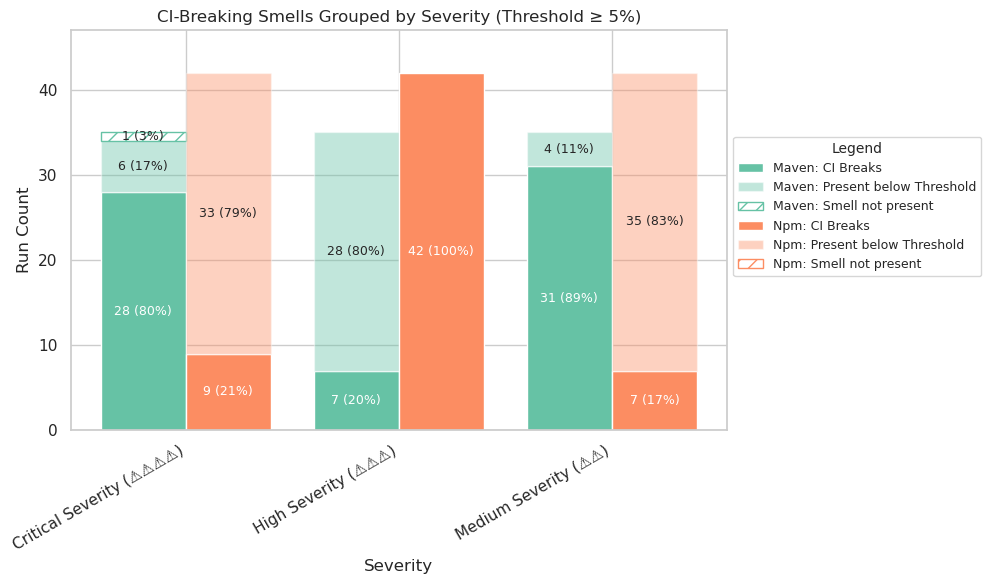

In [89]:
threshold = 0.05

# Determine severity based on number of ⚠️ signs
def get_severity(label):
    severities = {
        "1": ["Low", "⚠️"],
        "2": ["Medium", "⚠️⚠️"],
        "3": ["High", "⚠️⚠️⚠️"],
        "4": ["Critical", "⚠️⚠️⚠️⚠️"]
    }
    count = label.count('⚠️')
    return f"{severities.get(str(count), ['Unknown'])[0]} Severity ({severities.get(str(count), ['Unknown'])[1]})"

# Define non-applicable severities for Maven (same as previous logic)
non_applicable_labels = {
    "(⚠️⚠️⚠️) No Build Attestation",
    "(⚠️⚠️) Deprecated",
    "(⚠️⚠️) Aliased"
}
# non_applicable_severities_for_maven = set(get_severity(label) for label in non_applicable_labels)
# print(f"Non-applicable severities for Maven: {non_applicable_severities_for_maven}")

# Rebuild grouped data by severity
grouped_data = {}

for manager, runs in counts.items():
    for run_id, metrics in runs.items():
        total = metrics['total']

        group_stats = {}
        for full_key, count in metrics.items():
            if full_key == 'total':
                continue

            label = next((v for k, v in smell_labels.items() if k == full_key), None)
            if not label:
                continue

            severity = get_severity(label)
            # if manager == 'maven' and severity in non_applicable_severities_for_maven:
            #     continue

            group_stats.setdefault(severity, {'breaks': False, 'has_smell': False})

            if count / total >= threshold:
                group_stats[severity]['breaks'] = True
            elif count > 0:
                group_stats[severity]['has_smell'] = True

        for severity, flags in group_stats.items():
            grouped_data.setdefault(severity, {}).setdefault(manager, {
                'breaks': 0, 'has_smell': 0, 'no_smell': 0, 'total': 0
            })
            stats = grouped_data[severity][manager]
            stats['total'] += 1
            if flags['breaks']:
                stats['breaks'] += 1
            elif flags['has_smell']:
                stats['has_smell'] += 1
            else:
                stats['no_smell'] += 1

# Prepare DataFrame
records = []
severity_order = {
    "Critical Severity (⚠️⚠️⚠️⚠️)": 4,
    "High Severity (⚠️⚠️⚠️)": 3,
    "Medium Severity (⚠️⚠️)": 2,
    "Low Severity (⚠️)": 1,
    "Unknown Severity": 0
}
# all_severities = sorted(set(grouped_data) | non_applicable_severities_for_maven, key=lambda x: severity_order.get(x, 0), reverse=True)
all_severities = sorted(set(grouped_data), key=lambda x: severity_order.get(x, 0), reverse=True)

for severity in all_severities:
    for manager in ['Maven', 'Npm']:
        if manager.lower() not in grouped_data.get(severity, {}):
            # Mark non-applicable
            records.append({
                'Severity': severity,
                'Package Manager': manager,
                'Breaks': None,
                'Has Smell': None,
                'No Smell': None,
                'Total': None,
                # 'Applicable': not (manager == 'Maven' and severity in non_applicable_severities_for_maven)
            })
        else:
            stats = grouped_data[severity][manager.lower()]
            records.append({
                'Severity': severity,
                'Package Manager': manager,
                'Breaks': stats['breaks'],
                'Has Smell': stats['has_smell'],
                'No Smell': stats['no_smell'],
                'Total': stats['total'],
                # 'Applicable': True
            })

df = pd.DataFrame(records)

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

colors = {'Maven': '#66c2a5', 'Npm': '#fc8d62'}
bar_width = 0.4

df['Severity'] = pd.Categorical(df['Severity'], categories=all_severities, ordered=True)
df = df.sort_values(by='Severity')

x_labels = df['Severity'].unique()
position_map = {
    (severity, 'Maven'): i - bar_width / 2 for i, severity in enumerate(x_labels)
}
position_map.update({
    (severity, 'Npm'): i + bar_width / 2 for i, severity in enumerate(x_labels)
})

# Ensure count columns are integers (nullable)
for col in ['Breaks', 'Has Smell', 'No Smell', 'Total']:
    df[col] = df[col].astype('Int64')

for severity in x_labels:
    for manager in ['Maven', 'Npm']:
        row = df[(df['Severity'] == severity) & (df['Package Manager'] == manager)].iloc[0]
        pos = position_map[(severity, manager)]

        # if not row['Applicable']:
        #     plt.bar(pos, 1, width=bar_width, color='none', edgecolor='red',
        #             hatch='//', linestyle='--', linewidth=2)
        #     plt.text(pos, 1.02, "N/A", ha='center', va='bottom',
        #              fontsize=9, color='red', weight='bold')
        #     continue

        total = row['Total']
        breaks = row['Breaks']
        has_smell = row['Has Smell']
        no_smell = row['No Smell']
        color = colors[manager]

        bottom = 0
        if breaks:
            plt.bar(pos, breaks, width=bar_width, color=color)
            plt.text(pos, bottom + breaks / 2, f"{breaks} ({breaks/total:.0%})", ha='center', va='center', color='white', fontsize=9)
            bottom += breaks
        if has_smell:
            plt.bar(pos, has_smell, width=bar_width, bottom=bottom, color=color, alpha=0.4)
            plt.text(pos, bottom + has_smell / 2, f"{has_smell} ({has_smell/total:.0%})", ha='center', va='center', fontsize=9)
            bottom += has_smell
        if no_smell:
            print(f"Severity: {severity}, No Smell: {no_smell}, Row: {row}")
            plt.bar(pos, no_smell, width=bar_width, bottom=bottom, color='white', edgecolor=color, hatch='//')
            plt.text(pos, bottom + no_smell / 2, f"{no_smell} ({no_smell/total:.0%})", ha='center', va='center', fontsize=9)

# Formatting
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=30, ha='right')
plt.title("CI-Breaking Smells Grouped by Severity (Threshold ≥ 5%)")
plt.ylabel("Run Count")
plt.xlabel("Severity")

legend_handles = [
    Patch(facecolor=colors['Maven'], label='Maven: CI Breaks'),
    Patch(facecolor=colors['Maven'], alpha=0.4, label='Maven: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Maven'], hatch='//', label='Maven: Smell not present'),
    Patch(facecolor=colors['Npm'], label='Npm: CI Breaks'),
    Patch(facecolor=colors['Npm'], alpha=0.4, label='Npm: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Npm'], hatch='//', label='Npm: Smell not present'),
    # Patch(facecolor='none', edgecolor='red', hatch='//', label='Not Applicable')
]
plt.legend(handles=legend_handles, title="Legend", fontsize=9, title_fontsize=10,
           loc='upper left', bbox_to_anchor=(1.0, 0.75), borderaxespad=0.5)

plt.ylim(top=max(df['Total'].dropna()) + 5)
plt.tight_layout()
plt.show()


In [ ]:
import os
import re
import json
from collections import defaultdict

# Helper to determine which package manager a file belongs to
def get_package_manager(path):
    if "npm" in path.lower():
        return "npm"
    if "maven" in path.lower():
        return "maven"
    return "unknown"

# Pattern to identify package@version from table rows
package_version_pattern = re.compile(r"^([\w\-.@/]+@\d[^\s|]*)")

# Initialize per-package-manager containers
smell_data = {
    "npm": {
        "package_smells": defaultdict(list),
        "dependency_to_parents": defaultdict(list),
        "parent_to_dependencies": defaultdict(set),
        "smell_severity_by_package": defaultdict(set)
    },
    "maven": {
        "package_smells": defaultdict(list),
        "dependency_to_parents": defaultdict(list),
        "parent_to_dependencies": defaultdict(set),
        "smell_severity_by_package": defaultdict(set)
    }
}

# Step 1: Parse all smell and dependency tables
for pm in ["npm", "maven"]:
    path = f"project-runs/{pm}-runs"
    for root, dirs, files in os.walk(path):
        for filename in files:
            if filename.endswith("_summary.md"):
                # print(f"Parsing {filename} for {pm}...")
                path = os.path.join(root, filename)
                pm = get_package_manager(path)
                if pm not in smell_data:
                    continue  # Skip unknown formats

                with open(path, "r", encoding="utf-8") as f:
                    # print(f"Parsing {filename} for {pm}...")
                    lines = f.readlines()
                    # print(f"Found {len(lines)} lines in {filename}")

                current_smell = None
                in_table = False
                headers = []
                for line in lines:
                    # Match smell category
                    match = re.match(r"##\s+Smelly packages: (.+?)\s*$", line)
                    if match:
                        current_smell = match.group(1).strip()
                        continue

                    # Start of a markdown table
                    if line.startswith("|") and "Package" in line and "Parent" in line:
                        in_table = True
                        headers = [h.strip().lower() for h in line.strip().split("|")[1:-1]]
                        continue

                    # End of table
                    if in_table and not line.startswith("|"):
                        in_table = False
                        continue

                    # Parse table row
                    if in_table:
                        columns = [col.strip() for col in line.strip().split("|")[1:-1]]
                        row = dict(zip(headers, columns))
                        package = row.get("package")
                        parents = row.get("parent(s)", "") or ""

                        if package:
                            # Register smell
                            smell_data[pm]["package_smells"][package].append(current_smell)
                            smell_data[pm]["smell_severity_by_package"][package].add(current_smell)

                            # Extract parents
                            if parents.lower() not in {"none", ""}:
                                parent_list = [p.strip() for p in parents.split(",")]
                                smell_data[pm]["dependency_to_parents"][package].extend(parent_list)
                                for parent in parent_list:
                                    smell_data[pm]["parent_to_dependencies"][parent].add(package)

# Step 2: Build taint analysis per package manager
for pm in ["npm", "maven"]:
    taint_analysis = {}
    smells = smell_data[pm]["package_smells"]
    severity = {pkg: len(v) for pkg, v in smell_data[pm]["smell_severity_by_package"].items()}
    parent_map = smell_data[pm]["parent_to_dependencies"]

    for parent, children in parent_map.items():
        direct_smells = severity.get(parent, 0)
        tainted_children = []

        for child in children:
            child_score = severity.get(child, 0)
            if child_score > 0:
                tainted_children.append({
                    "package": child,
                    "smell_score": child_score,
                    "smells": sorted(smells[child])
                })

        if tainted_children:
            taint_analysis[parent] = {
                "direct_smells": direct_smells,
                "tainted_children": sorted(tainted_children, key=lambda x: x["smell_score"], reverse=True)
            }

    # Step 3: Output
    output_file = f"project-runs/outcomes/{pm}_taint_analysis.json"
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(taint_analysis, f, indent=2)

    print(f"[{pm.upper()}] Taint analysis written to: {output_file}")

Parsing 313b902b9a72c64501074db9bc2b9897d2db5140_static_summary.md for npm...
Found 1022 lines in 313b902b9a72c64501074db9bc2b9897d2db5140_static_summary.md
Parsing a124cce86eff988cec15215994b33bb79b5e7443_static_summary.md for npm...
Found 230 lines in a124cce86eff988cec15215994b33bb79b5e7443_static_summary.md
Parsing a141bc0f00b194e9ac5146f52e74c0e8236784a6_static_summary.md for npm...
Found 646 lines in a141bc0f00b194e9ac5146f52e74c0e8236784a6_static_summary.md
Parsing 8e5d06b2f0e6d7cfe83d19eb0a9c572d2c598232_static_summary.md for npm...
Found 507 lines in 8e5d06b2f0e6d7cfe83d19eb0a9c572d2c598232_static_summary.md
Parsing 514861c372899df14beb7aaecca4cdbb498d7d11_static_summary.md for npm...
Found 473 lines in 514861c372899df14beb7aaecca4cdbb498d7d11_static_summary.md
Parsing 0569cd3373408f9d701d3aab187b3f43a24a0db7_static_summary.md for npm...
Found 433 lines in 0569cd3373408f9d701d3aab187b3f43a24a0db7_static_summary.md
Parsing e5351d02e225e275ac0e497c7b66eaa5f0c88791_static_summary